**Import Libraries**

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings ('ignore')

**Import Dataset**

In [501]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [503]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [504]:
# Creating dummy vairables 
df=pd.get_dummies(df,columns=['Urban','Undergrad','Marital.Status'], drop_first=True)

In [505]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,1,0,0,1
1,33700,134075,18,1,1,0,0
2,36925,160205,30,1,0,1,0
3,50190,193264,15,1,1,0,1
4,81002,27533,28,0,0,1,0


In [506]:
# Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["Tax.Inc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
print(df)

     Taxable.Income  City.Population  Work.Experience  Urban_YES  \
0             68833            50047               10          1   
1             33700           134075               18          1   
2             36925           160205               30          1   
3             50190           193264               15          1   
4             81002            27533               28          0   
..              ...              ...              ...        ...   
595           76340            39492                7          1   
596           69967            55369                2          1   
597           47334           154058                0          1   
598           98592           180083               17          0   
599           96519           158137               16          0   

     Undergrad_YES  Marital.Status_Married  Marital.Status_Single Tax.Inc  
0                0                       0                      1    Good  
1                1             

# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [507]:
# After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["Tax.Inc"],drop_first=True)

In [508]:
# Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Tax.Inc_Good
590,43018,85195,14,1,0,1,0,1
591,27394,132859,18,1,1,0,1,0
592,68152,75143,16,0,1,0,1,1
593,84775,131963,10,1,0,0,0,1
594,47364,97526,9,1,0,1,0,1
595,76340,39492,7,1,1,0,0,1
596,69967,55369,2,1,1,0,0,1
597,47334,154058,0,1,0,0,0,1
598,98592,180083,17,0,1,1,0,1
599,96519,158137,16,0,0,0,0,1


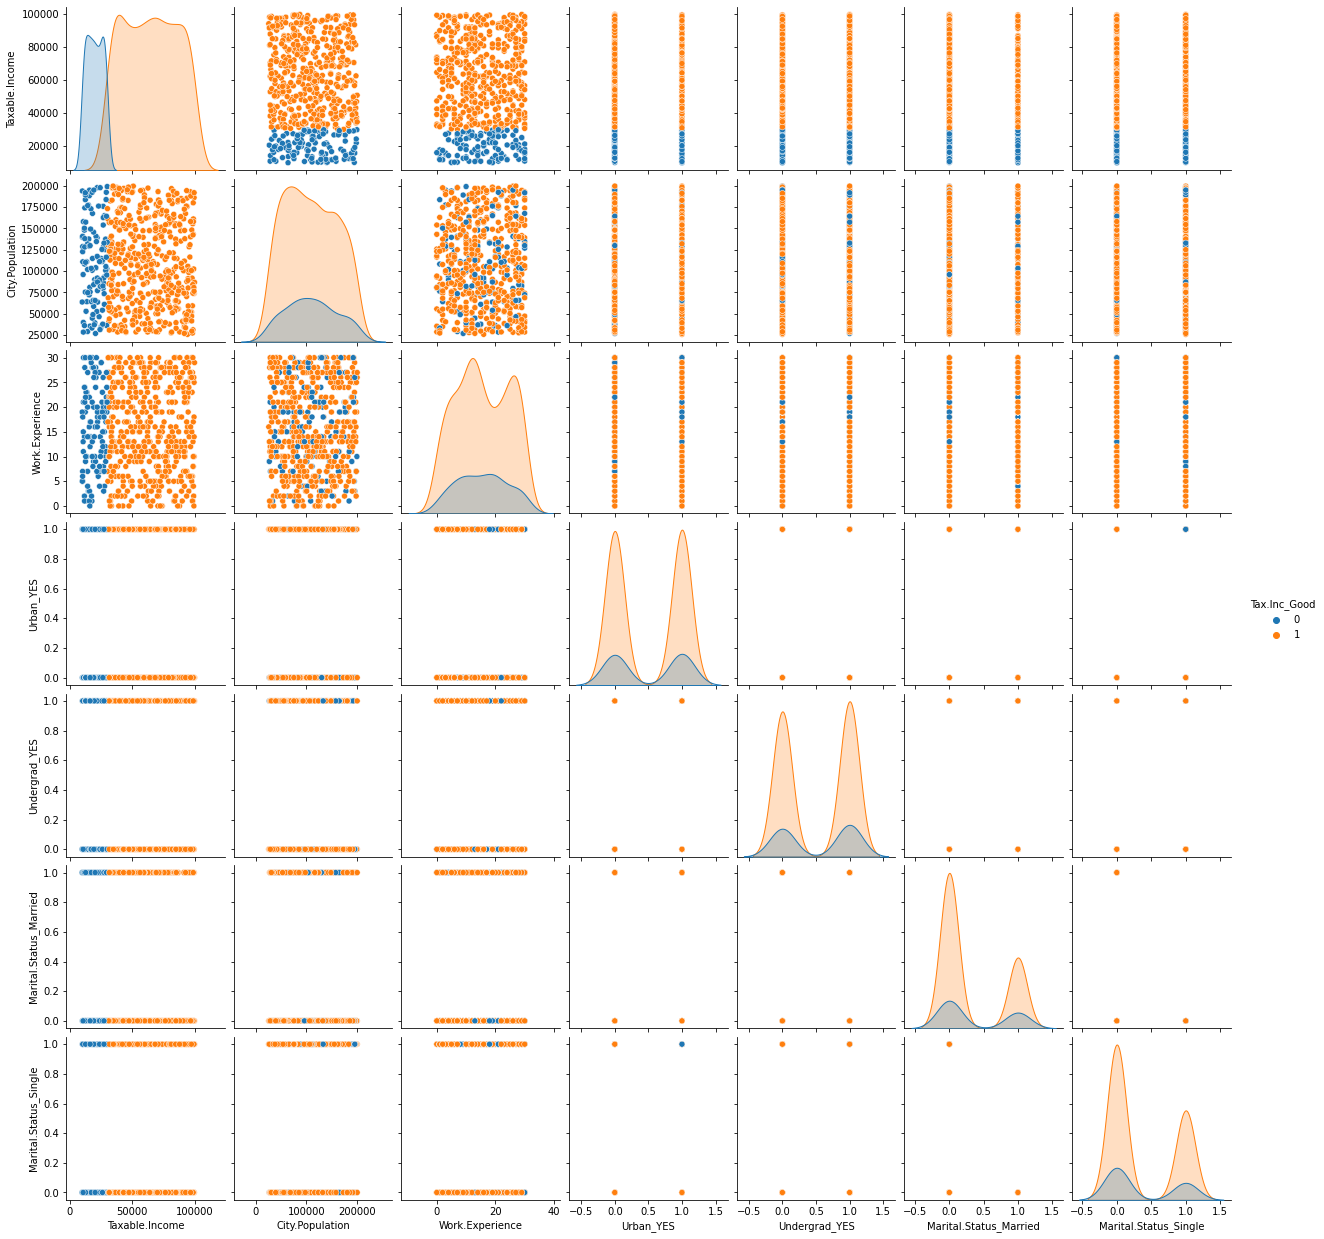

In [509]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'Tax.Inc_Good')

In [510]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [511]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Tax.Inc_Good
590,0.341473,0.466667,1.0,0.0,1.0,0.0,1.0
591,0.615406,0.600000,1.0,1.0,0.0,1.0,0.0
592,0.283703,0.533333,0.0,1.0,0.0,1.0,1.0
593,0.610256,0.333333,1.0,0.0,0.0,0.0,1.0
594,0.412341,0.300000,1.0,0.0,1.0,0.0,1.0
595,0.078811,0.233333,1.0,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,1.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,1.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [512]:
# Declaring features & target
X = df_norm.drop(['Tax.Inc_Good'], axis=1)
y = df_norm['Tax.Inc_Good']

In [513]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40) 

In [514]:
# Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [515]:
# Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [516]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
# As we are getting error as "ValueError: could not convert string to float: 'YES'".
# Model.fit doesnt not consider String. So, we encode

In [517]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [518]:
# Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [519]:
# Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [520]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [521]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [522]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [523]:
model.n_outputs_

1

In [524]:
model.oob_score_

0.66875

In [525]:
# Predictions on train data
prediction = model.predict(x_train)

In [527]:
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
np.mean(prediction == y_train)

0.9895833333333334

In [528]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [535]:
# Prediction on test data
pred_test = model.predict(x_test)
pred_test

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=uint8)

In [536]:
# Accuracy
acc_test =accuracy_score(y_test,pred_test)
acc_test

0.675

In [531]:
# In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [532]:
tree = model.estimators_[5]

In [533]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,
   class_names = target,impurity =False)

In [534]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Decision Tree (C5.0)

# Building Decision Tree Classifier Using Entropy Criteria

In [537]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

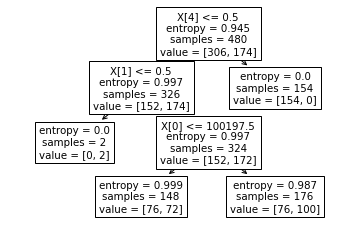

In [539]:
# plot the decision tree
from sklearn import tree
tree.plot_tree(model);

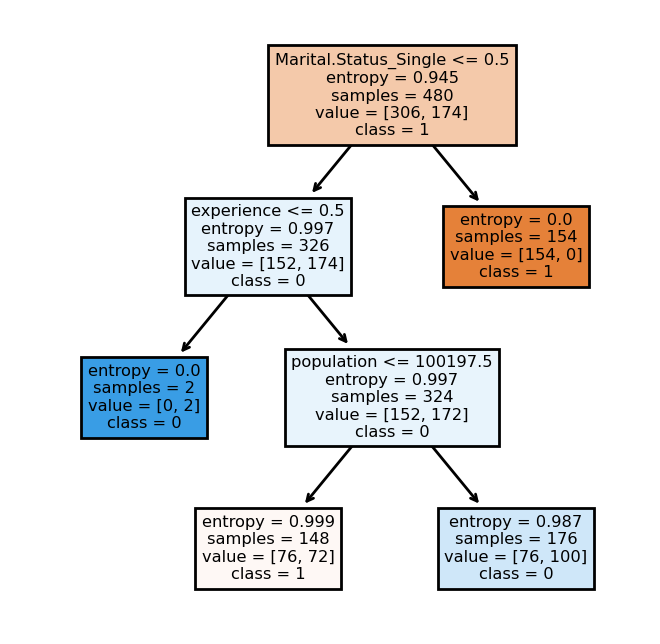

In [541]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [542]:
# Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    70
1    50
dtype: int64

In [543]:
preds

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=uint8)

In [544]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds) 

col_0,0,1
Marital.Status_Single,,
0,49,28
1,21,22


In [545]:
# Accuracy 
np.mean(preds==y_test)

0.5916666666666667

# Decision Tree (CART)

# Building Decision Tree Classifier Using Gini Criteria

In [546]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [547]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [548]:
# Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5916666666666667

# Building Decision Tree Regression criteria

In [549]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [550]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [552]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [558]:
# Find the test accuracy
model.score(X_test,y_test)

0.2911211129296237

In [559]:
# Find the train accuracy
model.score(X_train,y_train)

0.328530115676107